In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
student_data = pd.read_csv('/content/drive/MyDrive/Concepts and Technology of AI/week5/student.csv')

# Print top 5 rows
student_data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [24]:
# Print bottom 5 rows
student_data.tail()

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [25]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [26]:
student_data.describe()  # Provides statistical summary of numerical columns

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [28]:
# asssuming 'Writing' is the target variable
X = student_data[['Math', 'Reading']].values
Y = student_data['Writing'].values

In [29]:
# createing matrices in proper format
# transposing X to match the required format
X = X.T
Y = Y.reshape(-1, 1)
W = np.zeros((2, 1))

print("\nMatrix Shapes:")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"W shape: {W.shape}")


Matrix Shapes:
X shape: (2, 1000)
Y shape: (1000, 1)
W shape: (2, 1)


In [30]:
# To-Do 3: Train-Test Split
# transpose X back to the original shape (n, d)
X = X.T

# perform 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTrain-Test Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


Train-Test Shapes:
X_train shape: (800, 2)
X_test shape: (200, 2)
Y_train shape: (800, 1)
Y_test shape: (200, 1)


Cost function test: 0.0
Final Weights: [0.34811659 0.64614558]
First 10 iterations cost: [2013.165570783755, 1640.286832599692, 1337.0619994901588, 1090.4794892850578, 889.9583270083234, 726.8940993009545, 594.2897260808594, 486.4552052951635, 398.7634463599484, 327.4517147324688]
RMSE: 5.2798239764188635
R²: 0.8886354462786421


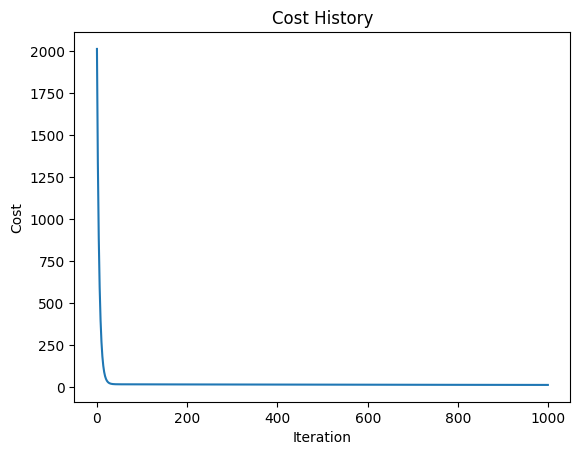

In [31]:
def cost_function(X, Y, W):
    """Calculate Mean Square Error"""
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1/(2*m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    """Perform gradient descent optimization"""
    m = len(Y)
    cost_history = [0] * iterations

    for iteration in range(iterations):
        # step 1
        Y_pred = np.dot(X, W)

        # step 2
        loss = Y_pred - Y

        # step 3
        dw = (1/m) * np.dot(X.T, loss)

        # step 4
        W_update = W - alpha * dw

        # step 5
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost
        W = W_update

    return W, cost_history

def rmse(Y, Y_pred):
    """Calculate Root Mean Square Error"""
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    """Calculate R-squared score"""
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def main():
    #load and prepare data
    X = student_data[['Math', 'Reading']].values
    Y = student_data['Writing'].values

    #train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    #initialize parameters
    W = np.zeros((X_train.shape[1], 1))
    alpha = 0.00001
    iterations = 1000

    #train model
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    #predictions
    Y_pred = np.dot(X_test, W_optimal)

    #evaluate model
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    #print results
    print("Final Weights:", W_optimal.flatten())
    print("First 10 iterations cost:", cost_history[:10])
    print("RMSE:", model_rmse)
    print("R²:", model_r2)

    #plot cost history
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.show()

if __name__ == "__main__":
    #test cost function
    X_test = np.array([[1, 2], [3, 4], [5, 6]])
    Y_test = np.array([3, 7, 11]).reshape(-1, 1)
    W_test = np.array([1, 1]).reshape(-1, 1)
    test_cost = cost_function(X_test, Y_test, W_test)
    print("Cost function test:", test_cost)

    #run main training
    main()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
